In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/세미프로젝트/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/세미프로젝트


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [4]:
df = pd.read_csv('kr3_data_category.csv')
# df.isnull().sum()
# data = df.dropna()
# data.isnull().sum()
# data
df

,Unnamed: 0,Rating,Review,length,review_spell_check
0,0,1,개인적으로 제일 좋아하는 냉면집진짜 집 근처였으면 일주일에 한번씩갈것같아요,41,개인적으로 제일 좋아하는 냉면집 진짜 집 근처였으면 일주일에 한 번씩 갈 것 같아요
1,1,1,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...,79,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...
2,2,1,아주머니 혼자하시는 식당이고 푸짐해요국물이 사골이라 맛있어요 순대는 쏘쏘해요,42,아주머니 혼자 하시는 식당이고 푸짐해요 국물이 사골이라 맛있어요 순대는 쏘쏘해요
3,3,1,장어가 담백하면서 고소하고 맛있습니다 비린맛이 적어 물리지 않고 맛있게 먹을 수 있어요,48,장어가 담백하면서 고소하고 맛있습니다 비린 맛이 적어 물리지 않고 맛있게 먹을 수 있어요
4,4,1,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳,41,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳
...,...,...,...,...,...
54376,61444,1,자연밥상세트중에 마누라밥상 먹었어요 이거 많이 드시는거같던데 바싹소불고기랑 고등어구...,115,자연밥상 세트 중에 마누라 밥상 먹었어요 이거 많이 드시는 거 같던데 바싹 소 불고...
54377,61445,1,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치안보고 편하게 셀바에서...,123,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치 안 보고 편하게 셀바...
54378,61446,1,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...,118,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...
54379,61447,1,가격대비 괜찮긴한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 살짝...,76,가격 대비 괜찮긴 한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 ...


In [5]:
### 결측치 제거
df.isnull().sum()
df.dropna(inplace=True)  # 결측치 제거
df.reset_index(drop=True, inplace=True)  # 인덱스 재설정

# 결과 확인
df.isnull().sum()

Unnamed: 0            0
Rating                0
Review                0
length                0
review_spell_check    0
dtype: int64

In [6]:
# 이모지와 특수문자 여부 검사 및 제거
import re

# 정규식 패턴으로 이모지와 특수문자를 검색하는 패턴
pattern = r'[^\w\sㄱ-ㅣ가-힣]+'

# 이모지와 특수문자가 있는 행 추출
emoji_special_chars_rows = df[
    (df['Review'].str.contains(pattern)) | (df['review_spell_check'].str.contains(pattern))]

# 추출된 행 출력
print(emoji_special_chars_rows)

print('='*80)
df.info()

       Unnamed: 0  Rating                                             Review  \
34             37       1  의왕역 냉면집비빔냉면 ★★★★☆김치콩나물국밥 ★★☆☆☆ 의왕역 근처 음식점 냉면은 ...   
97            104       1  너무 맛있는 돼지갈비 고깃집입니다 맛도 맛인데 가격도 착합니다 비냉보다 물냉맛이 시...   
151           164       1             발 욕나오게 맛있음 중독됨 또 가고싶음   단점 사람이 ♪♩♬게 많다   
153           166       0    진짜 싸가지 없어서 그냥 들어가자마자 나왔어요 서비스 죽이네요 가지마세요 ♪♩♪♪임    
188           201       1     나오자마자 정신없이먹느라 냉면사진을 깜빡할 정도로 맛나요맛나♡ 만두꼭시켜드십시오들♡   
...           ...     ...                                                ...   
54050       61109       1  떡볶이 덕후로서 신전은 사랑입니다 둘이서 만원정도면 진짜 맛있는 떡볶이와 튀김 그리...   
54051       61110       1  점심에 종종 혼밥하는 터포키 중독자입니당 엽떡도 맛있지만 신전도 신전만의 맛이 있지...   
54079       61144       1                     친절하고 이 동네에서 가장 오래된집 맛있어요 ♡♡♡♡♡   
54328       61411       1  맛있어서 다 먹었더니 뻥튀기를 주시더군여이득★ 그리고 원래 연근 안좋아하는편인데 여...   
54358       61441       1  저희는 마누라밥상1 이모님밥상1 이렇게 두개 주문해서 먹었는데 낙지볶음이랑 불고기 ...   

       length                          

In [7]:
# 이모지 및 특수문자 제거
import re

def remove_special_characters(text):
    pattern = r'[^\w\sㄱ-ㅣ가-힣]'  # 특수문자나 이모지 패턴
    clean_text = re.sub(pattern, '', text)
    return clean_text

df['clean_Review'] = df['Review'].apply(remove_special_characters)
df['clean_review_spell_check'] = df['review_spell_check'].apply(remove_special_characters)

# 결과 확인
df

,Unnamed: 0,Rating,Review,length,review_spell_check,clean_Review,clean_review_spell_check
0,0,1,개인적으로 제일 좋아하는 냉면집진짜 집 근처였으면 일주일에 한번씩갈것같아요,41,개인적으로 제일 좋아하는 냉면집 진짜 집 근처였으면 일주일에 한 번씩 갈 것 같아요,개인적으로 제일 좋아하는 냉면집진짜 집 근처였으면 일주일에 한번씩갈것같아요,개인적으로 제일 좋아하는 냉면집 진짜 집 근처였으면 일주일에 한 번씩 갈 것 같아요
1,1,1,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...,79,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...
2,2,1,아주머니 혼자하시는 식당이고 푸짐해요국물이 사골이라 맛있어요 순대는 쏘쏘해요,42,아주머니 혼자 하시는 식당이고 푸짐해요 국물이 사골이라 맛있어요 순대는 쏘쏘해요,아주머니 혼자하시는 식당이고 푸짐해요국물이 사골이라 맛있어요 순대는 쏘쏘해요,아주머니 혼자 하시는 식당이고 푸짐해요 국물이 사골이라 맛있어요 순대는 쏘쏘해요
3,3,1,장어가 담백하면서 고소하고 맛있습니다 비린맛이 적어 물리지 않고 맛있게 먹을 수 있어요,48,장어가 담백하면서 고소하고 맛있습니다 비린 맛이 적어 물리지 않고 맛있게 먹을 수 있어요,장어가 담백하면서 고소하고 맛있습니다 비린맛이 적어 물리지 않고 맛있게 먹을 수 있어요,장어가 담백하면서 고소하고 맛있습니다 비린 맛이 적어 물리지 않고 맛있게 먹을 수 있어요
4,4,1,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳,41,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳
...,...,...,...,...,...,...,...
54361,61444,1,자연밥상세트중에 마누라밥상 먹었어요 이거 많이 드시는거같던데 바싹소불고기랑 고등어구...,115,자연밥상 세트 중에 마누라 밥상 먹었어요 이거 많이 드시는 거 같던데 바싹 소 불고...,자연밥상세트중에 마누라밥상 먹었어요 이거 많이 드시는거같던데 바싹소불고기랑 고등어구...,자연밥상 세트 중에 마누라 밥상 먹었어요 이거 많이 드시는 거 같던데 바싹 소 불고...
54362,61445,1,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치안보고 편하게 셀바에서...,123,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치 안 보고 편하게 셀바...,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치안보고 편하게 셀바에서...,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치 안 보고 편하게 셀바...
54363,61446,1,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...,118,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...
54364,61447,1,가격대비 괜찮긴한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 살짝...,76,가격 대비 괜찮긴 한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 ...,가격대비 괜찮긴한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 살짝...,가격 대비 괜찮긴 한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 ...


In [8]:
# 이모지와 특수문자가 있는 행 추출
emoji_special_chars_rows = df[
    (df['clean_Review'].str.contains(pattern)) | (df['clean_review_spell_check'].str.contains(pattern))]

# 추출된 행 출력
print(emoji_special_chars_rows)

Empty DataFrame
Columns: [Unnamed: 0, Rating, Review, length, review_spell_check, clean_Review, clean_review_spell_check]
Index: []


In [9]:
# 불필요한 열 제거
# 제거할 열의 리스트
df = df.drop(['Unnamed: 0', 'length', 'Review', 'review_spell_check'], axis=1)
df

,Rating,clean_Review,clean_review_spell_check
0,1,개인적으로 제일 좋아하는 냉면집진짜 집 근처였으면 일주일에 한번씩갈것같아요,개인적으로 제일 좋아하는 냉면집 진짜 집 근처였으면 일주일에 한 번씩 갈 것 같아요
1,1,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...
2,1,아주머니 혼자하시는 식당이고 푸짐해요국물이 사골이라 맛있어요 순대는 쏘쏘해요,아주머니 혼자 하시는 식당이고 푸짐해요 국물이 사골이라 맛있어요 순대는 쏘쏘해요
3,1,장어가 담백하면서 고소하고 맛있습니다 비린맛이 적어 물리지 않고 맛있게 먹을 수 있어요,장어가 담백하면서 고소하고 맛있습니다 비린 맛이 적어 물리지 않고 맛있게 먹을 수 있어요
4,1,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳
...,...,...,...
54361,1,자연밥상세트중에 마누라밥상 먹었어요 이거 많이 드시는거같던데 바싹소불고기랑 고등어구...,자연밥상 세트 중에 마누라 밥상 먹었어요 이거 많이 드시는 거 같던데 바싹 소 불고...
54362,1,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치안보고 편하게 셀바에서...,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치 안 보고 편하게 셀바...
54363,1,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...
54364,1,가격대비 괜찮긴한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 살짝...,가격 대비 괜찮긴 한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 ...


In [10]:
# 열 이름 변경
df = df.rename(columns={'clean_Review': 'Review', 'clean_review_spell_check': 'review_spell_check'})
df

,Rating,Review,review_spell_check
0,1,개인적으로 제일 좋아하는 냉면집진짜 집 근처였으면 일주일에 한번씩갈것같아요,개인적으로 제일 좋아하는 냉면집 진짜 집 근처였으면 일주일에 한 번씩 갈 것 같아요
1,1,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...,방화동 구석의 정말 허름한 노포 아저씨의 응대가 유쾌하고 살갑다 손으로 쓴 메뉴판 ...
2,1,아주머니 혼자하시는 식당이고 푸짐해요국물이 사골이라 맛있어요 순대는 쏘쏘해요,아주머니 혼자 하시는 식당이고 푸짐해요 국물이 사골이라 맛있어요 순대는 쏘쏘해요
3,1,장어가 담백하면서 고소하고 맛있습니다 비린맛이 적어 물리지 않고 맛있게 먹을 수 있어요,장어가 담백하면서 고소하고 맛있습니다 비린 맛이 적어 물리지 않고 맛있게 먹을 수 있어요
4,1,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳,오픈 이벤트로 막국수 할인 중이며 맛있고 푸짐하여 가족 외식으로 괜찮은 곳
...,...,...,...
54361,1,자연밥상세트중에 마누라밥상 먹었어요 이거 많이 드시는거같던데 바싹소불고기랑 고등어구...,자연밥상 세트 중에 마누라 밥상 먹었어요 이거 많이 드시는 거 같던데 바싹 소 불고...
54362,1,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치안보고 편하게 셀바에서...,한상차림으로 똭 나오고 거기에 다른 필요한 쌈류나 반찬들 눈치 안 보고 편하게 셀바...
54363,1,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...,여기 정말 진짜 맛있음 마지막에 넣는 마늘이 더해져 느끼하지 않은 국물 햄 종류도 ...
54364,1,가격대비 괜찮긴한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 살짝...,가격 대비 괜찮긴 한데 가격을 자꾸 올리고 샐러드바 메뉴는 줄어드는 경향이 있어서 ...


In [11]:
# 긍정 컬럼에서 1만개의 랜덤 샘플 추출
positive_sample = df[df['Rating']==1].sample(n=10000, random_state=13)

# 부정 컬럼에서 1만개의 랜덤 샘플 추출
negative_sample = df[df['Rating']==0].sample(n=10000, random_state=13)

# 추출된 샘플을 결합
balanced_df = pd.concat([positive_sample, negative_sample])

# 행을 무작위로 섞음
df = balanced_df.sample(frac=1, random_state=13).reset_index(drop=True)
rating_check = df['Rating'].unique()
print(rating_check)
# 결과 확인
print(df['Rating'].value_counts())
print('='*100)
df

[0 1]
0    10000
1    10000
Name: Rating, dtype: int64


,Rating,Review,review_spell_check
0,0,가격대비 제일싼거만 그냥저냥 괜찬고 30000원이상 왜 여기서 먹는지 시끄럽고 별루...,가격 대비 제일 싼 거만 그냥저냥 괜찮고 30000원 이상 왜 여기서 먹는지 시끄럽...
1,0,3월 20일에 이곳을 방문하여 3만원짜리 정식을 4인 주문했습니다 2만원짜리는 조기...,3월 20일에 이곳을 방문하여 3만 원짜리 정식을 4인 주문했습니다 2만 원짜리는 ...
2,0,눈이맵고 기침많이나고 그것들을참으면서 먹기는좀 힘들더라구요,눈이 맵고 기침 많이 나고 그것들을 참으면서 먹기는 좀 힘들더라고요
3,1,비싸도 맛있어요 삼청동에가면 꼭 한번 들려야하는곳이에요,비싸도 맛있어요 삼청동에 가면 꼭 한번 들려야 하는 곳이에요
4,1,자욱한 연기에 뭘 먹었는지 기억이 안나던 시절 부터 다녔던 집 고추장이면 간장이며 ...,자욱한 연기에 뭘 먹었는지 기억이 안 나던 시절부터 다녔던 집 고추장이면 간장이며 ...
...,...,...,...
19995,1,기본으로 주시는 오렌지소스가 오렌지 맛이 그대로 느껴지는 상큼한 맛이에요 정말 맛있어요,기본으로 주시는 오렌지 소스가 오렌지 맛이 그대로 느껴지는 상큼한 맛이에요 정말 맛있어요
19996,1,고기 최고 짱짱 충성충성충성,고기 최고 짱짱 충성 충성 충성
19997,1,너무 맛있고 좋았어요 저렴한 가격에 맛있게 잘먹었습니다,너무 맛있고 좋았어요 저렴한 가격에 맛있게 잘 먹었습니다
19998,0,유명한 집이길래 가본곳고기는 질기고 달다냉면은 마트에서 파는 냉면 사서 쓰는듯한맛파...,유명한 집이길래 가 본 곳이 고기는 질기고 달다 냉면은 마트에서 파는 냉면 사서 쓰...


In [12]:
### 전처리 코드

def preprocess(data):
  my_split = []
  for pas in data.iloc:
    data = (pas['review_spell_check'])
    split_data = data.split(' ')
    for i in split_data:
      if len(i) >= 2:
        my_split.append(i)
  return my_split

In [13]:
# # 개수 확인

pre_data = preprocess(df)
print(Counter(pre_data))

Counter({'너무': 3749, '정말': 2188, '진짜': 1819, '먹고': 1717, '그냥': 1697, '맛이': 1517, '맛있어요': 1341, '고기': 1281, '맛은': 1222, '맛도': 1161, '많이': 1090, '먹을': 1008, '다른': 951, '먹는': 878, '있는': 860, '음식': 772, '맛있게': 764, '가격': 760, '여기': 720, '갔는데': 706, '엄청': 693, '맛있는': 677, '맛집': 673, '맛있고': 671, '별로': 660, '먹었는데': 649, '좋은': 641, '하고': 615, '다시': 591, '않고': 578, '없고': 567, '같아요': 558, '냉면': 544, '그리고': 537, '기분': 521, '가서': 517, '서비스': 512, '이런': 510, '양이': 508, '나오는': 494, '같이': 492, '하는': 489, '해서': 479, '좋아요': 469, '없는': 464, '보고': 460, '같은': 459, '조금': 456, '맛있다': 451, '양도': 448, '반찬': 448, '없음': 442, '가지': 439, '대비': 435, '정도': 433, '맛있었어요': 433, '먹으면': 425, '하나': 424, '없이': 420, '아주': 416, '맛있음': 413, '식당': 413, '처음': 408, '좋고': 405, '가는': 398, '절대': 392, '이렇게': 390, '근데': 389, '건지': 379, '고기가': 376, '마세요': 375, '있어서': 373, '손님': 371, '먹었습니다': 370, '것도': 367, '가고': 361, '먹었어요': 354, '가면': 353, '사람': 350, '떡볶이': 350, '불친절': 348, '자주': 344, '먹으러': 343, '제일': 342, '가격도': 342, '갑니다': 338, 

In [14]:
# 분담을 위해

# positive = []
# negative = []
# for i in pre_data:
#   if '맛있' in i:
#     print(i)
#     positive.append(i)

#   elif '맛없'in i:
#     print(i)
#     negative.append(i)

# df = pd.DataFrame(negative, columns=['negative'])

# output_file = 'negative.csv'
# df.to_csv(output_file, index=False, encoding='utf-8-sig')

In [15]:
# 맛있어요, 맛없어요 키워드 정리

df['맛있어요'] = 0
df['친절'] = 0
df['깔끔'] = 0
df['최고'] = 0
df['가성비'] = 0

df['맛없어요'] = 0
df['불친절'] = 0
df['최악'] = 0
df['별로'] = 0
df['다신'] = 0


positive_list = ['맛있지는', '감칠맛있게', '맛있는진', '아주맛있지도', '맛있는녀석들', '맛있는녀석들', '맛있는녀석들도', '애매한맛뭐가맛있는건지', '맛있는지는', '맛있다는건지',  '맛있는건가', '감칠맛있고', '맛있을줄', '맛있는맛은', '맛있을텐데', '맛있을겁니다', '맛있던곳인데', '맛있다는건가', '맛있지는', '안맛있는게', '맛있다고해서', '맛있어서웨이팅길겠거니그냥고', '맛있다고하길래', '맛있는거였나', '맛있다하기엔',  '맛있으려나',  '맛있냐',  '맛있었던건지', '맛있어지는때라겨울엔', '맛있었음근데지금은', '그닥맛있게', '맛있어봤자얼마나', '맛있다는건아니고김밥빼고', '맛있어야하는데밥이질다두번이용은', '작년5월에댕겨왔는데진짜의문인곳뭐가맛있다는건지', '더맛있는곳가세요', '맛있다기보단', '맛있었는데요즘은', '맛있었는데', '맛있진않다떡볶이는', '맛있음httpmblognavercomPostViewnhnblogIdyujini0310logNo220402717533', '맛있진않아도', '여기왜맛있다는건지다들', '맛있었는데쫄면은', '하러가고싶은맛맛있게먹은사람이', '맛있을리가', '밍밍맛있다고', '오이소박이추가주문까지시켜먹었는데그맛있는그집이아니었습니다너무달아요', '맛있을거라하던데', '맛있게짠게아니였네요', '안맛있음', '맛있다고해서', '맛있진않아도', '맛있는진', '맛있는걸까요', '그렇게맛있다는데', '별로인데맛있었다는', '맛있다더니', '너무달다매운맛도달다육회초밥이나불고기초밥은맛있게', '맛있어야하는데', '맛있는걸까효', '맛있다기', '맛있다기보다', '맛있다는건', '머가맛있다는건지', '맛있지는', '맛있는데가더많은데', '맛있는대가', '시간버리지마셔요맛있으면', '왜맛있다는지', '완전불친절맛있다고해도입맛사라지는들어갔다기분상하고나옴', '주시는데맛있진', '맛있지는', '맛있진않지만', '맛있진', '맛있지도', '맛있었던가', '딱히맛있는건없고재료는', '맛있지도', '엄청맛있지는', '오이소박이추가주문까지시켜먹었는데그맛있는그집이아니었습니다너무달아요',  '김치가맛있어야하는데', '엄청맛있다할정돈', '엄청맛있다할정돈', '안맛있음', '맛있는줄', '맛있는거였나', '맛있지도', '미원냄새는왜케나는지이영자아무데나맛있다고하나보네', '맛있을까요', '그렇게맛있는정도는아니다반찬이', '맛있지도', '결코맛있지도않은수준',  '맛있진않아요', '가격대비맛있는지','맛있을듯', '맛있대요', '맛있을거', '맛있다고', '줬으면맛있음', '맛있다기보단', '맛있었어요아이가', '맛있을', '맛있지도', '맛있을것같아', '맛있다란', '맛있으면', '맛있을까하고', '미원냄새는왜케나는지이영자아무데나맛있다고하나보네', '맛있기도', '맛있을', '맛있는건', '그렇게맛있는정도는아니다반찬이', '맛있을수가없어요', '맛있는것도', '맛있겠냐만은', '결코맛있지도않은수준', '맛있어서라기보단', '맛있던먹을때는']
exclusion_patterns1 = [word for word in positive_list]

exclusion_regex1 = '|'.join(exclusion_patterns1)
print(exclusion_regex1)

negative_del_list = ['누가맛없데', '누가맛없데', '맛없는게없어요', '입맛없었는데', '아주맛없냐하면', '맛없어짐살은', '맛없다고하면', '맛없다는', '맛없을수가', '맛없는', '맛없지도', '맛없는', '맛없기로', '맛없는게없더라구요', '입맛없을', '입맛없을', '입맛없을때가면', '맛없다고', '백숙맛없을줄알았는데', '입맛없을때', '맛없다고는', '입맛없을때', '깊은맛없음', '입맛없을때', '매운맛없이', '맛없을거같았는데', '단맛없는', '맛없을수가없지', '맛없진않은데', '조미료맛없이', '비린맛없는', '맛없는건아닌데', '맛없는게없네요', '조미료맛없이', '맛없어서']
exclusion_patterns2 = [word for word in negative_del_list]

exclusion_regex2 = '|'.join(exclusion_patterns2)
print(exclusion_regex2)

df.loc[df['review_spell_check'].str.contains('맛있', na=False) & ~df['review_spell_check'].str.contains(exclusion_regex1, na=False),'맛있어요'] = 1

df.loc[df['review_spell_check'].str.contains('친절', na=False) & ~df['review_spell_check'].str.contains('불친절', na=False),'친절'] = 1

df.loc[df['review_spell_check'].str.contains('깔끔', na=False), '깔끔'] = 1

df.loc[df['review_spell_check'].str.contains('최고', na=False), '최고'] = 1

df.loc[df['review_spell_check'].str.contains('가성비', na=False), '가성비'] = 2

df.loc[df['review_spell_check'].str.contains('맛없', na=False) & ~df['review_spell_check'].str.contains(exclusion_regex2, na=False),'맛없어요'] = 1

df.loc[df['review_spell_check'].str.contains('불친절', na=False),'불친절'] = 1

df.loc[df['review_spell_check'].str.contains('최악', na=False), '최악'] = 1

df.loc[df['review_spell_check'].str.contains('별로', na=False), '별로'] = 1

df.loc[df['review_spell_check'].str.contains('다신', na=False) | df['review_spell_check'].str.contains('다시는', na=False), '다신'] = 1

#df.loc[df['review_spell_check'].str.contains('다시는', na=False), '다시는'] = 1

df['pos_total'] = df[['맛있어요', '친절', '깔끔', '최고']].sum(axis=1)

df['neg_total'] = df[['맛없어요', '불친절', '최악', '별로', '다신']].sum(axis=1)

맛있지는|감칠맛있게|맛있는진|아주맛있지도|맛있는녀석들|맛있는녀석들|맛있는녀석들도|애매한맛뭐가맛있는건지|맛있는지는|맛있다는건지|맛있는건가|감칠맛있고|맛있을줄|맛있는맛은|맛있을텐데|맛있을겁니다|맛있던곳인데|맛있다는건가|맛있지는|안맛있는게|맛있다고해서|맛있어서웨이팅길겠거니그냥고|맛있다고하길래|맛있는거였나|맛있다하기엔|맛있으려나|맛있냐|맛있었던건지|맛있어지는때라겨울엔|맛있었음근데지금은|그닥맛있게|맛있어봤자얼마나|맛있다는건아니고김밥빼고|맛있어야하는데밥이질다두번이용은|작년5월에댕겨왔는데진짜의문인곳뭐가맛있다는건지|더맛있는곳가세요|맛있다기보단|맛있었는데요즘은|맛있었는데|맛있진않다떡볶이는|맛있음httpmblognavercomPostViewnhnblogIdyujini0310logNo220402717533|맛있진않아도|여기왜맛있다는건지다들|맛있었는데쫄면은|하러가고싶은맛맛있게먹은사람이|맛있을리가|밍밍맛있다고|오이소박이추가주문까지시켜먹었는데그맛있는그집이아니었습니다너무달아요|맛있을거라하던데|맛있게짠게아니였네요|안맛있음|맛있다고해서|맛있진않아도|맛있는진|맛있는걸까요|그렇게맛있다는데|별로인데맛있었다는|맛있다더니|너무달다매운맛도달다육회초밥이나불고기초밥은맛있게|맛있어야하는데|맛있는걸까효|맛있다기|맛있다기보다|맛있다는건|머가맛있다는건지|맛있지는|맛있는데가더많은데|맛있는대가|시간버리지마셔요맛있으면|왜맛있다는지|완전불친절맛있다고해도입맛사라지는들어갔다기분상하고나옴|주시는데맛있진|맛있지는|맛있진않지만|맛있진|맛있지도|맛있었던가|딱히맛있는건없고재료는|맛있지도|엄청맛있지는|오이소박이추가주문까지시켜먹었는데그맛있는그집이아니었습니다너무달아요|김치가맛있어야하는데|엄청맛있다할정돈|엄청맛있다할정돈|안맛있음|맛있는줄|맛있는거였나|맛있지도|미원냄새는왜케나는지이영자아무데나맛있다고하나보네|맛있을까요|그렇게맛있는정도는아니다반찬이|맛있지도|결코맛있지도않은수준|맛있진않아요|가격대비맛있는지|맛있을듯|맛있대요|맛있을거|맛있다고|줬으면맛있음|맛있다기보단|맛있었어요아이가|맛있을|맛있지도|맛있을것같아|맛있다란|맛있으면|맛있을까하고|미원

In [16]:
output_file = 'test.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')

In [17]:
df

,Rating,Review,review_spell_check,맛있어요,친절,깔끔,최고,가성비,맛없어요,불친절,최악,별로,다신,pos_total,neg_total
0,0,가격대비 제일싼거만 그냥저냥 괜찬고 30000원이상 왜 여기서 먹는지 시끄럽고 별루...,가격 대비 제일 싼 거만 그냥저냥 괜찮고 30000원 이상 왜 여기서 먹는지 시끄럽...,0,0,0,0,2,0,0,0,1,0,0,1
1,0,3월 20일에 이곳을 방문하여 3만원짜리 정식을 4인 주문했습니다 2만원짜리는 조기...,3월 20일에 이곳을 방문하여 3만 원짜리 정식을 4인 주문했습니다 2만 원짜리는 ...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,눈이맵고 기침많이나고 그것들을참으면서 먹기는좀 힘들더라구요,눈이 맵고 기침 많이 나고 그것들을 참으면서 먹기는 좀 힘들더라고요,0,0,0,0,0,0,0,0,0,0,0,0
3,1,비싸도 맛있어요 삼청동에가면 꼭 한번 들려야하는곳이에요,비싸도 맛있어요 삼청동에 가면 꼭 한번 들려야 하는 곳이에요,1,0,0,0,0,0,0,0,0,0,1,0
4,1,자욱한 연기에 뭘 먹었는지 기억이 안나던 시절 부터 다녔던 집 고추장이면 간장이며 ...,자욱한 연기에 뭘 먹었는지 기억이 안 나던 시절부터 다녔던 집 고추장이면 간장이며 ...,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,기본으로 주시는 오렌지소스가 오렌지 맛이 그대로 느껴지는 상큼한 맛이에요 정말 맛있어요,기본으로 주시는 오렌지 소스가 오렌지 맛이 그대로 느껴지는 상큼한 맛이에요 정말 맛있어요,1,0,0,0,0,0,0,0,0,0,1,0
19996,1,고기 최고 짱짱 충성충성충성,고기 최고 짱짱 충성 충성 충성,0,0,0,1,0,0,0,0,0,0,1,0
19997,1,너무 맛있고 좋았어요 저렴한 가격에 맛있게 잘먹었습니다,너무 맛있고 좋았어요 저렴한 가격에 맛있게 잘 먹었습니다,1,0,0,0,0,0,0,0,0,0,1,0
19998,0,유명한 집이길래 가본곳고기는 질기고 달다냉면은 마트에서 파는 냉면 사서 쓰는듯한맛파...,유명한 집이길래 가 본 곳이 고기는 질기고 달다 냉면은 마트에서 파는 냉면 사서 쓰...,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [19]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [20]:
# 위생 부문(1)
clean = ['담배', '먼지', '벌레', '쓰레기']
clean = '|'.join(clean)
df_clean = df.loc[df['review_spell_check'].str.contains(clean,  na=False)].drop(['Review','맛있어요', '친절', '깔끔', '최고', '가성비', '맛없어요', '불친절','최악','별로','다신','pos_total','neg_total'], axis=1)
df_clean

,Rating,review_spell_check
90,0,발레 강제 2천 원 냉면 11000원인데 면은 뭉쳐나오고 값어치는 안되는 듯 맛은 ...
95,0,210928 맛있다고 하는 사람들은 원래 고기 질도 더 좋고 국물도 진하고 더 맛...
393,0,별 하나도 아깝네 댸기자 명단 잘 못해놓고선 사과도 없고 자리 있으니깐 들어가세요 ...
447,0,갈비는 맛이 있으면 비싸고 그러나 물냉면과 함께 나왔던 식초 동안에 벌레들 빠져있던...
473,0,어른 2 8세 아이 1명 가서 백반 2 서대 회 1시 키니 왜 백반을 3인분 안 시...
...,...,...
19668,0,불친절 아무 맛도 안 나는 닭갈비 벌레 많음
19760,0,진심 별 한 개도 모자람 알바인지 직원인지 개 불친절에 우리 표정 안 좋아지니 계산...
19762,0,쓰레기 같다 주정뱅이들 사이에서 30분 기다려서 가락국수 먹고 싶으면 가
19954,0,점심으로 보리밥 먹었는데 맛은 있는데 밥에 고춧가루 묻어서 나온 거까진 이해했는데 ...


In [21]:
# 위생 부문(2)
# '담배', '먼지', '벌레', '쓰레기'
clean = []
for my_data in df_clean.iloc:
    data = (my_data['review_spell_check']).split(' ')
    for i in data:
      if '담배' in i and len(i) == 2:
        clean.append(i)
      elif '먼지' in i and len(i) == 2:
        clean.append(i)
      elif '벌레' in i and len(i) == 2:
        clean.append(i)
      elif '쓰레기' in i and len(i) == 3:
        clean.append(i)
print(pd.Series(data=clean).value_counts())

쓰레기    68
담배     28
벌레     19
먼지     15
dtype: int64


In [22]:
# 서비스 부문(1)

service = ['컴플레인', '클레임', '반말', '불친절', '친절']
service = '|'.join(service)
df_service = df.loc[df['review_spell_check'].str.contains(service,  na=False)].drop(['Review','맛있어요', '친절', '깔끔', '최고', '가성비', '맛없어요', '불친절','최악','별로','다신','pos_total','neg_total'], axis=1)
df_service

,Rating,review_spell_check
28,1,분위가 도 좋고 상차림도 깔끔하며 직원들도 친절하고 모든 음식이 골고루...
36,1,사장님도 친절하시고 고기도 맛있고 된장찌개까지 끝내줌
43,0,싸지 않고 친절하지 않고 양이 적고 간이 강하다 한식이 반찬이 절반 이상이라 생각하...
46,0,며칠 전 부모님 모시고 5명이 갔는데 사람은 많다 23명 앉았는데 한상만 반찬 줘서...
54,0,별 1개도 아까움 인원 대비 음식을 많이 시켜서 그중 약초 쟁반을 포장해달라고 함 ...
...,...,...
19958,1,부모님 모시고 다녀왔는데 음식도 깔끔하게 나오고 직원분들도 친절하게 해주셔서 덕분에...
19963,0,세상 불친절한 곳 카운터 할머니 사장님도 불친절 서빙 아주머니들도 불친절 맛은 보통
19968,0,진짜 살면서 본 식당 중에 젤 불친절 인원 수보다 1인분이라도 적게 시키면 바로 째...
19973,1,직원 사장님 전부 친절하고 일단 고기가 맛있어요 제가 간 날은 껍데기 서비스도 주셨...


In [23]:
# 서비스 부문(2)
service = []
for my_data in df_service.iloc:
    data = (my_data['review_spell_check']).split(' ')
    for i in data:
      if '컴플레인' in i and len(i) == 4:
        service.append(i)
      elif '클레임' in i and len(i) == 3:
        service.append(i)
      elif '반말' in i and len(i) == 2:
        service.append(i)
      elif '불친절' in i and len(i) == 3:
        service.append(i)
      elif '친절' in i and len(i) == 2:
        service.append(i)
print(pd.Series(data=service).value_counts())

불친절     348
친절       71
컴플레인     24
반말       12
클레임       8
dtype: int64


In [24]:
# 음식 부문(1)
# 키워드. 맛, 양, 입맛, 집밥??  => 추후에 수정 가능성 있음

food = ['맛', '양', '입맛', '집밥']
food = '|'.join(food)
df_food = df.loc[df['review_spell_check'].str.contains(food,  na=False)].drop(['Review','맛있어요', '친절', '깔끔', '최고', '가성비', '맛없어요', '불친절','최악','별로','다신','pos_total','neg_total'], axis=1)
df_food

,Rating,review_spell_check
1,0,3월 20일에 이곳을 방문하여 3만 원짜리 정식을 4인 주문했습니다 2만 원짜리는 ...
3,1,비싸도 맛있어요 삼청동에 가면 꼭 한번 들려야 하는 곳이에요
4,1,자욱한 연기에 뭘 먹었는지 기억이 안 나던 시절부터 다녔던 집 고추장이면 간장이며 ...
5,1,고기의 복불복이 좀 있는 편이고 기는 항상 맛있는데 비계의 비율이 좀 많아서 다른 ...
6,1,중독성 있는 맛 떡볶이가 당길 때 생각나요
...,...,...
19992,0,티브이에 나온 맛집이라는데 참기름 때문인지 느끼한 느낌이 강함 냉면이랑 갈비탕 먹음
19995,1,기본으로 주시는 오렌지 소스가 오렌지 맛이 그대로 느껴지는 상큼한 맛이에요 정말 맛있어요
19997,1,너무 맛있고 좋았어요 저렴한 가격에 맛있게 잘 먹었습니다
19998,0,유명한 집이길래 가 본 곳이 고기는 질기고 달다 냉면은 마트에서 파는 냉면 사서 쓰...


In [25]:
# 음식 부문(2)
food = []
for my_data in df_food.iloc:
    data = (my_data['review_spell_check']).split(' ')
    for i in data:
      if '맛' in i and len(i) == 1:
        food.append(i)
      elif '양' in i and len(i) == 1:
        food.append(i)
      elif '입맛' in i and len(i) == 2:
        food.append(i)
      elif '집밥' in i and len(i) == 2:
        food.append(i)
print(pd.Series(data=food).value_counts())

# 어떤 키워드가 더 있을까? 생각해볼 것...

맛     1406
양      301
입맛      70
집밥      34
dtype: int64


In [26]:
# 분위기 부문(1)
vibe = ['인테리어', '편안', '감성', '깔끔']     # => 추후에 수정 가능성 있음
vibe = '|'.join(vibe)
df_vibe = df.loc[df['review_spell_check'].str.contains(vibe,  na=False)].drop(['Review','맛있어요', '친절', '깔끔', '최고', '가성비', '맛없어요', '불친절','최악','별로','다신','pos_total','neg_total'], axis=1)
df_vibe

,Rating,review_spell_check
28,1,분위가 도 좋고 상차림도 깔끔하며 직원들도 친절하고 모든 음식이 골고루...
115,1,여기 음식이 깔끔하고 맛이 좋았어요 가평 놀러 가서 신나게 물놀이하고 좀 늦은 점심...
124,1,음식이 깔끔하니 맛있어서 식사 대접하기도 좋은 곳 같아요
239,0,깔끔함 그것밖에 없음 비빔밥 맛 보장 못 함양은 다소 많음 불고기 간장 누린내가...
248,1,부산 놀러 갔다가 찐 맛집 찾았네요 신메뉴 고등어조림 쌈밥에 곰장어 시켜서 같이 먹...
...,...,...
19923,1,양도 많고 깔끔하고 너무 맛있어요 식사하면서 보는 함덕 해변도 예쁘고 아침부터 든든...
19946,1,추천받아 갔는데 진짜 너무 맛있어요 가게도 깔끔해서 좋았고요 음식이 너무 신선합니다...
19955,1,여자 혼자 여행 중 진짜 배고파 죽을뻔했는데 다 2인분씩 주문이던지 사장님 장 보...
19958,1,부모님 모시고 다녀왔는데 음식도 깔끔하게 나오고 직원분들도 친절하게 해주셔서 덕분에...


In [27]:
# 분위기 부문(2)
vibe = []
for my_data in df_vibe.iloc:
    data = (my_data['review_spell_check']).split(' ')
    for i in data:
      if '인테리어' in i and len(i) == 4:
        vibe.append(i)
      elif '편안' in i:
        vibe.append(i)
      elif '감성' in i and len(i) == 2:
        vibe.append(i)
      elif '정갈' in i:
        vibe.append(i)
print(pd.Series(data=vibe).value_counts())

# 편안 관련 => 편안한, 편안하게, 편안하고
# 정갈 관련 => 정갈한, 정갈하게, 정갈하고
# 어떤 키워드가 더 있을까? 갬성? 인스타? 인별? ???

인테리어      31
정갈하고      23
정갈하게      14
정갈한       10
감성         9
편안한        9
편안하게       6
편안하고       4
정갈하니       4
정갈해서       3
정갈함        2
편안하고요      1
편안하네요      1
편안했습니다     1
정갈하네요      1
편안하면서도     1
편안함        1
편안해지는      1
편안해져요      1
편안히        1
정갈하며       1
편안함과       1
정갈하면서      1
정갈했습니다     1
정갈해요       1
dtype: int64


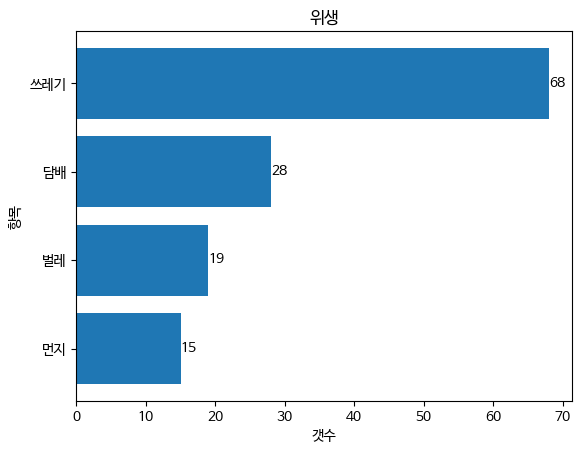

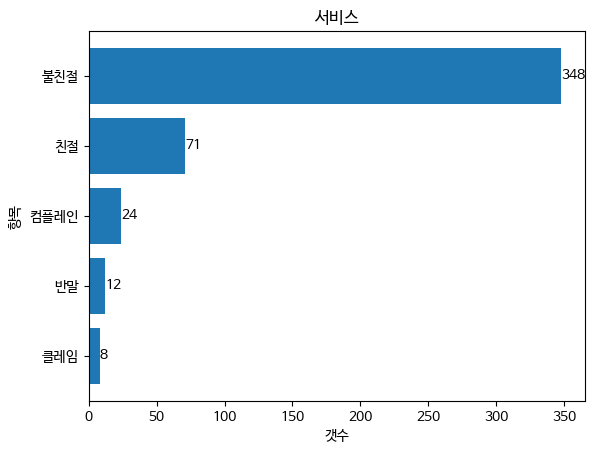

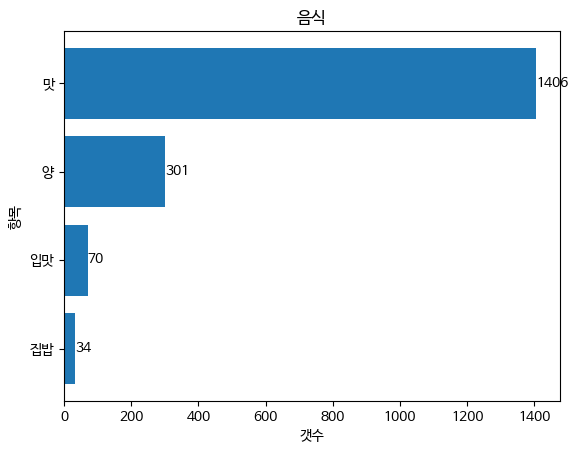

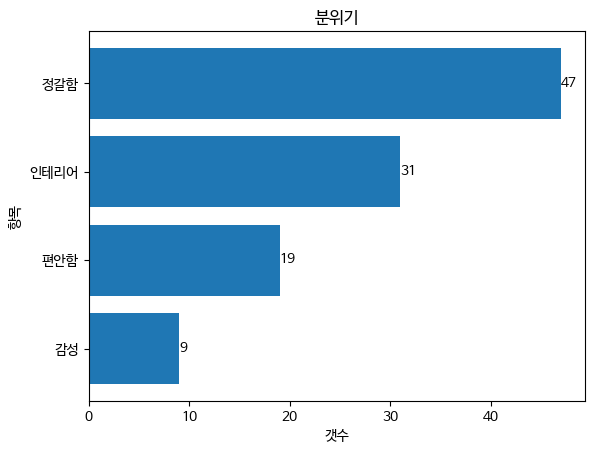

In [28]:

#########################################
############## 시각화 part ##############
#########################################



# 위생 부문 시각화
count_cigarette = clean.count('담배')
count_dust = clean.count('먼지')
count_insects = clean.count('벌레')
count_trash = clean.count('쓰레기')

categories = ['담배', '먼지', '벌레', '쓰레기']
counts = [count_cigarette, count_dust, count_insects, count_trash]
df_clean = pd.DataFrame({'indexs' : categories, 'val' : counts})                        # 크기 순으로 정렬된 막대그래프를 그리기 위해서 추가한 코드.
df_clean = df_clean.sort_values(by='val', ascending=True).reset_index(drop=True)        # 크기 순으로 정렬된 막대그래프를 그리기 위해서 추가한 코드.
plt.rc('font', family='NanumBarunGothic')
plt.barh(df_clean.indexs, df_clean.val)     # 크기 순으로 정렬된 막대그래프를 그리기 위해서 수정한 코드.
plt.xlabel('갯수')
plt.ylabel('항목')
plt.title('위생')
for i, count in enumerate(df_clean.val):    # 크기 순으로 정렬된 막대그래프를 그리기 위해서 수정한 코드.
    plt.text(count, i, str(count), va='center')
plt.show()

print('='*100)




# 서비스 부문 시각화
count_service1 = service.count('컴플레인')
count_service2 = service.count('클레임')
count_service3 = service.count('반말')
count_service4 = service.count('불친절')
count_service5 = service.count('친절')

categories = ['컴플레인', '클레임', '반말', '불친절', '친절']
counts = [count_service1, count_service2, count_service3, count_service4, count_service5]
df_service = pd.DataFrame({'indexs' : categories, 'val' : counts})                          # 크기 순으로 정렬된 막대그래프를 그리기 위해서 추가한 코드.
df_service = df_service.sort_values(by='val', ascending=True).reset_index(drop=True)        # 크기 순으로 정렬된 막대그래프를 그리기 위해서 추가한 코드.
plt.rc('font', family='NanumBarunGothic')
plt.barh(df_service.indexs, df_service.val)        # 크기 순으로 정렬된 막대그래프를 그리기 위해서 수정한 코드.
plt.xlabel('갯수')
plt.ylabel('항목')
plt.title('서비스')
for i, count in enumerate(df_service.val):         # 크기 순으로 정렬된 막대그래프를 그리기 위해서 수정한 코드.
    plt.text(count, i, str(count), va='center')
plt.show()

print('='*100)




# 음식 부문 시각화
count_food1 = food.count('맛')
count_food2 = food.count('양')
count_food3 = food.count('입맛')
count_food4 = food.count('집밥')

categories = ['맛', '양', '입맛', '집밥']
counts = [count_food1, count_food2, count_food3, count_food4]
df_food = pd.DataFrame({'indexs' : categories, 'val' : counts})
df_food = df_food.sort_values(by='val', ascending=True).reset_index(drop=True)
plt.rc('font', family='NanumBarunGothic')
plt.barh(df_food.indexs, df_food.val)
plt.xlabel('갯수')
plt.ylabel('항목')
plt.title('음식')
for i, count in enumerate(df_food.val):
    plt.text(count, i, str(count), va='center')
plt.show()

print('='*100)




# 분위기 부문 시각화
count_vibe1 = vibe.count('인테리어')
count_vibe2 = vibe.count('감성')
count_vibe3 = vibe.count('편안한') + vibe.count('편안하게') + vibe.count('편안하고')    # '편안'이 들어가는 키워드 3개의 총 수 합치기
count_vibe4 = vibe.count('정갈한') + vibe.count('정갈하게') + vibe.count('정갈하고')    # '정갈'이 들어가는 키워드 3개의 총 수 합치기

categories = ['인테리어', '감성', '편안함', '정갈함']
counts = [count_vibe1, count_vibe2, count_vibe3, count_vibe4]
df_vibe = pd.DataFrame({'indexs' : categories, 'val' : counts})                     # 크기 순으로 정렬된 막대그래프를 그리기 위해서 추가한 코드.
df_vibe = df_vibe.sort_values(by='val', ascending=True).reset_index(drop=True)      # 크기 순으로 정렬된 막대그래프를 그리기 위해서 추가한 코드.
plt.rc('font', family='NanumBarunGothic')
plt.barh(df_vibe.indexs, df_vibe.val)           # 크기 순으로 정렬된 막대그래프를 그리기 위해서 수정한 코드.
plt.xlabel('갯수')
plt.ylabel('항목')
plt.title('분위기')
for i, count in enumerate(df_vibe.val):         # 크기 순으로 정렬된 막대그래프를 그리기 위해서 수정한 코드.
    plt.text(count, i, str(count), va='center')
plt.show()